In [1]:
import xarray as xr
import numpy as np
from pathlib import Path
import pandas as pd

%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.colors import LogNorm

In [2]:
ipralpath = Path('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/04/06/ipral_1a_Lz1R15mF30sPbck_v01_20180406_000000_1440.nc')
ipralraw = xr.open_dataset(ipralpath)
ipralraw

<xarray.Dataset>
Dimensions:                (n_chan: 18, nv: 2, range: 4000, time: 916)
Coordinates:
  * time                   (time) datetime64[ns] 2018-04-06T15:00:58 ... 2018...
  * range                  (range) float32 15.0 30.0 45.0 ... 5.998e+04 6e+04
Dimensions without coordinates: n_chan, nv
Data variables: (12/73)
    time_bnds              (time, nv) datetime64[ns] ...
    lat                    float32 ...
    lon                    float32 ...
    altitude               float32 ...
    wavelength             (n_chan) float32 ...
    telescope              (n_chan) int32 ...
    ...                     ...
    bckgrd_rcs_16          (time) float64 ...
    rcs_17                 (time, range) float64 ...
    bckgrd_rcs_17          (time) float64 ...
    time_resol             (time) float32 ...
    range_resol            float32 ...
    tilt_angle             float32 ...
Attributes: (12/73)
    system:                          CNRS/IPSL IPRAL RAMAN multiwavelength Lidar
    manufacturers:                   Gordien Strato, Raymetrics, Spectra physics
    overlap_is_corrected:            false
    overlap_function:                false
    site_location:                   Palaiseau, France
    instrument_id:                   IPRAL
    ...                              ...
    telescope0_type:                 Enhanced Cassegrain+Nasmith
    telescope0_manufacturer:         Gordien Strato
    telescope0_model:                special
    telescope1_type:                 Newton
    telescope1_manufacturer:         Gordien Strato
    telescope1_model:                special

In [311]:
channels = ['rcs_12', 'rcs_13', 'rcs_16', 'rcs_17']
modes = ['355-analog-NearField', '355-photocounting-NearField', '532-analog-NearField', '532-photocounting-NearField']

In [312]:
nb =0
limiteZ = np.where(ipralraw['range']<=20000)[0]
dateStart = pd.to_datetime(ipralpath.name.split('_')[4])
dateEnd = dateStart + pd.DateOffset(1)
print(dateStart, dateEnd)

2018-04-06 00:00:00 2018-04-07 00:00:00


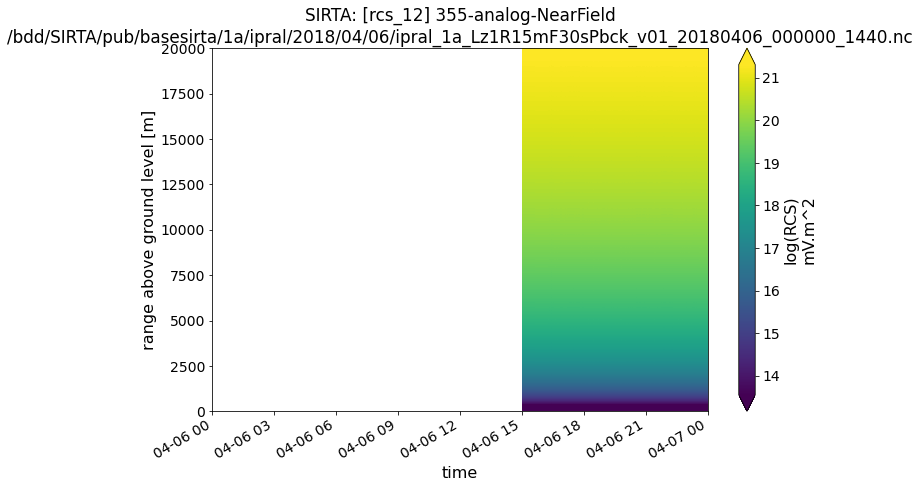

In [313]:

f, ax = plt.subplots(figsize=[10,7], nrows=1, ncols=1)
plt.rcParams['font.size'] = '14'
plt.rcParams['axes.labelsize'] = '16'

np.log(ipralraw[channels[nb]].isel(range=limiteZ)).plot(ax= ax, x = 'time', y='range', cmap = 'viridis',
                                  cbar_kwargs={"label": f'log(RCS)\n{ipralraw[channels[nb]].attrs["units"]}'}, robust=True)
ax.set_ylim(0,20000)
ax.set_xlim(dateStart, dateEnd)
ax.set(title=f'SIRTA: [{channels[nb]}] {modes[nb]}\n{ipralpath}')
plt.tight_layout()


In [314]:
pd.to_datetime(ipralraw['time'][0].values).date()#+ pd.DateOffset(1)

datetime.date(2018, 4, 6)

In [315]:
def correction_background(fileipral, channel):
    signal = fileipral[channel]
    bckgrd = fileipral['bckgrd_'+channel]
    ipralrange = fileipral['range'].values
    iprcsbck = (signal/(ipralrange**2) - bckgrd)*(ipralrange**2)
    rcsbrut = signal/(ipralrange**2)
    return iprcsbck, bckgrd, rcsbrut

In [316]:
iprcs, background, RCSbrut = correction_background(ipralraw, channels[nb])


[  0 457 915]
[  0 457 915]


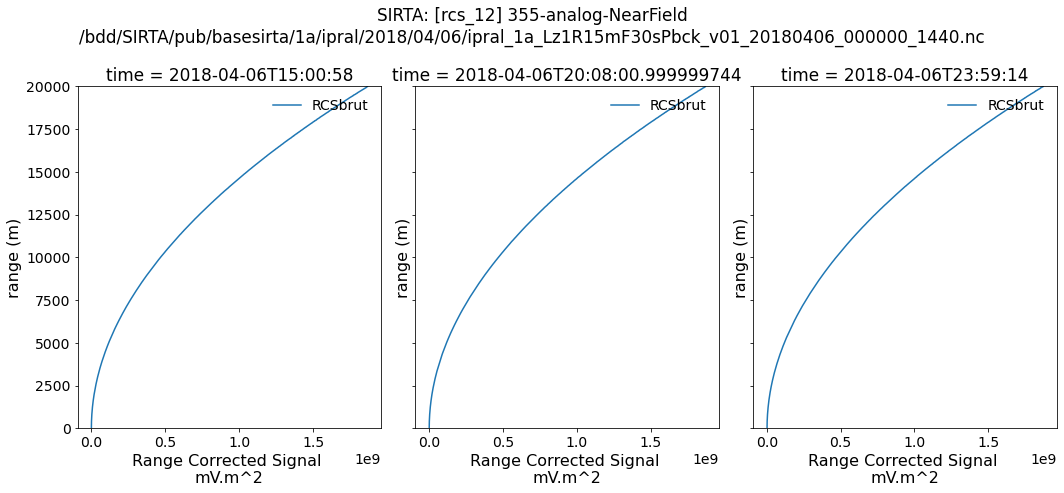

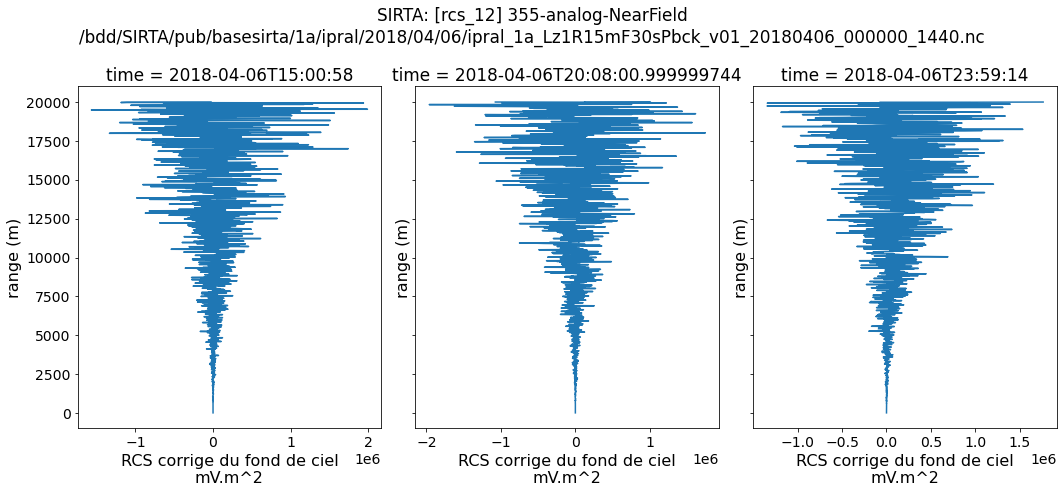

In [317]:
N = np.int_(np.linspace(0, len(ipralraw['time'])-1, 3))
print(N)
f, axs = plt.subplots(figsize=[15,7], nrows=1, ncols=3, sharey=True)
for n, ax in enumerate(axs.flatten()):
    ipralraw[channels[nb]].isel(time = N[n], range=limiteZ).plot(y = 'range', ax=ax, label = 'RCSbrut')
#     RCSbrut.isel(time = N[n], range=limiteZ).plot(y = 'range', ax=ax, label = 'brut')
#     ax.axvline(background.isel(time = N[n]), color='k', label = "fonddeciel")
    ax.legend(loc=1, frameon=False)#, title=f'background = {str(np.round(bckgrd.isel(time = N[n]).values,3))}')
    ax.set_ylim(0, 20000)
#     ax.set_xlim(0, 20)
    ax.set(ylabel ='range (m)', xlabel = f'Range Corrected Signal \n{ipralraw[channels[nb]].attrs["units"]}') #
#     ax2 = ax.twiny()
#     ax2.axvline(background.isel(time = N[n]), color='k', label = "RCSfonddeciel")
#     ax2.legend(loc=7, frameon=False)
#     ax2.set_xlim(background.isel(time = N[n]) - 0.01*background.isel(time = N[n]), background.isel(time = N[n]) + 0.01*background.isel(time = N[n]))
#     ax2.set(ylabel ='range (m)', xlabel = f'background signal, {background.attrs["units"]}')

plt.suptitle(f'SIRTA: [{channels[nb]}] {modes[nb]}\n{ipralpath}')
plt.tight_layout()

N = np.int_(np.linspace(0, len(ipralraw['time'])-1, 3))
print(N)
f1, axs = plt.subplots(figsize=[15,7], nrows=1, ncols=3, sharey=True)
for n, ax in enumerate(axs.flatten()):
#     np.log(ipralraw[channels[nb]].isel(time = N[n], range=limiteZ)).plot(y = 'range', ax=ax, label = 'RCS')
    iprcs.isel(time = N[n], range=limiteZ).plot(y = 'range', ax=ax, label = 'RCS background corrected')
#     ax.legend(loc='best', frameon=False)#, title=f'background = {str(np.round(bckgrd.isel(time = N[n]).values,3))}')
#     ax.set_ylim(0, 20000)
#     ax.set_xlim(0, 2e6)
    ax.set(ylabel ='range (m)', xlabel = f'RCS corrige du fond de ciel\n{ipralraw[channels[nb]].attrs["units"]}')

plt.suptitle(f'SIRTA: [{channels[nb]}] {modes[nb]}\n{ipralpath}')
plt.tight_layout()

/mnt/homedafs-2.5/lov/homedata/nmpnguyen/python_envs/ipral_tools/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/mnt/homedafs-2.5/lov/homedata/nmpnguyen/python_envs/ipral_tools/lib/python3.8/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


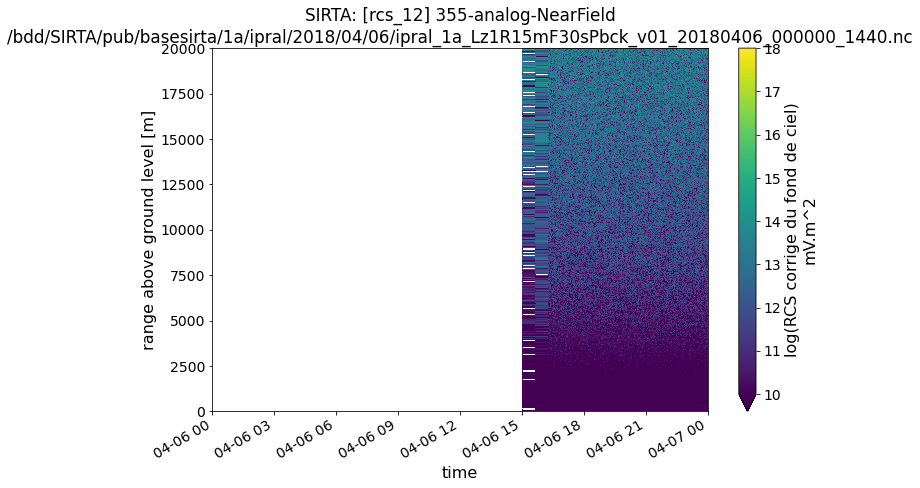

In [318]:
# le quicklook signal d'enlever le fond ciel
f, ax = plt.subplots(figsize=[10,7])
np.log(iprcs).plot(x='time', y='range', vmin=10, vmax=18,
                  cbar_kwargs={"label": f'log(RCS corrige du fond de ciel)\n{ipralraw[channels[nb]].attrs["units"]}'})
ax.set_ylim(0, 20000)
ax.set_xlim(dateStart, dateEnd)
ax.set(title=f'SIRTA: [{channels[nb]}] {modes[nb]}\n{ipralpath}')
plt.tight_layout()


## Depolarization study

In [3]:
ipralpath = Path('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/04/06/ipral_1a_Lz1R15mF30sPbck_v01_20180406_000000_1440.nc')
ipralraw = xr.open_dataset(ipralpath)
ipralraw

<xarray.Dataset>
Dimensions:                (n_chan: 18, nv: 2, range: 4000, time: 916)
Coordinates:
  * time                   (time) datetime64[ns] 2018-04-06T15:00:58 ... 2018...
  * range                  (range) float32 15.0 30.0 45.0 ... 5.998e+04 6e+04
Dimensions without coordinates: n_chan, nv
Data variables: (12/73)
    time_bnds              (time, nv) datetime64[ns] ...
    lat                    float32 ...
    lon                    float32 ...
    altitude               float32 ...
    wavelength             (n_chan) float32 ...
    telescope              (n_chan) int32 ...
    ...                     ...
    bckgrd_rcs_16          (time) float64 ...
    rcs_17                 (time, range) float64 ...
    bckgrd_rcs_17          (time) float64 ...
    time_resol             (time) float32 ...
    range_resol            float32 ...
    tilt_angle             float32 ...
Attributes: (12/73)
    system:                          CNRS/IPSL IPRAL RAMAN multiwavelength Lidar
    manufacturers:                   Gordien Strato, Raymetrics, Spectra physics
    overlap_is_corrected:            false
    overlap_function:                false
    site_location:                   Palaiseau, France
    instrument_id:                   IPRAL
    ...                              ...
    telescope0_type:                 Enhanced Cassegrain+Nasmith
    telescope0_manufacturer:         Gordien Strato
    telescope0_model:                special
    telescope1_type:                 Newton
    telescope1_manufacturer:         Gordien Strato
    telescope1_model:                special

In [4]:
ipral_dep = ipralraw['rcs_04']/ipralraw['rcs_02']

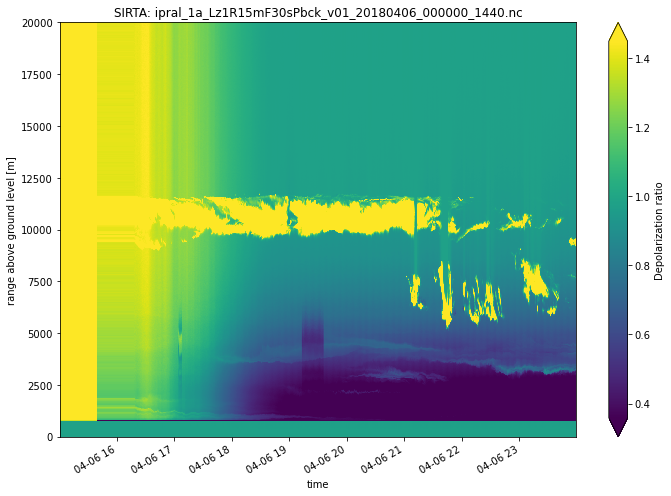

In [8]:
f, ax = plt.subplots(figsize=[10,7])
(ipral_dep).plot(x='time', y='range', robust=True,
                  cbar_kwargs={"label": f'Depolarization ratio'})
ax.set_ylim(0, 20000)
ax.set(title=f'SIRTA: {ipralpath.name}')
plt.tight_layout()

Calculer la Depolarisation depuis les canaux rcs04(perpendiculaire) et rcs02(parallele) du fichier brut puis étudier la distribution avec SR pour voir en ciel clair

In [2]:
## SR histogram from list of validated profiles
csv = pd.read_csv('/scratchx/nmpnguyen/IPRAL/raw/detection_clouds_test/IPRAL_2018_validated_profiles1.csv')
year = '2018'
IPRAL_PATH = Path('/bdd/SIRTA/pub/basesirta/1a/ipral/', year)
CALIB_PATH = Path('/homedata/nmpnguyen/IPRAL/RF/Calibrated/')
IPRAL_LISTFILES = sorted(CALIB_PATH.glob(f'ipral_1a_Lz1R15mF30sPbck_v01_{year}*_000000_1440.nc'))


In [3]:
def get_Depol_SR_validated(csv_listdates, wavelength):
    CALIB_PATH = Path('/homedata/nmpnguyen/IPRAL/RF/Calibrated/')
    date_of_list = pd.to_datetime(csv_listdates.iloc[1]).strftime('%Y%m%d')
    filepath = sorted(CALIB_PATH.glob(f'ipral_1a_Lz1R15mF30sPbck_v01_{date_of_list}_000000_1440.nc'))[0]
    print(filepath)
    datacalib = xr.open_dataset(filepath) 
    sr = datacalib['calibrated']/datacalib['simulated']
    time_selected = pd.to_datetime(csv_listdates).dropna().values
#     print(time_selected)
    sr_selected = sr.sel(time = time_selected, wavelength=wavelength)
    
    IPRAL_PATH = Path('/bdd/SIRTA/pub/basesirta/1a/ipral/')
    filepath = sorted(IPRAL_PATH.glob(f'**/**/**/ipral_1a_Lz1R15mF30sPbck_v01_{date_of_list}_000000_1440.nc'))[0]
    print(filepath)
    datacalib = xr.open_dataset(filepath) 
    if wavelength==532:
        dep_selected = None
    else:
        dep = datacalib['rcs_04']/datacalib['rcs_02']
        dep_selected = dep.sel(time = time_selected)
    return sr_selected, dep_selected
    

In [4]:
all_depol = None
all_SR = None
wave = 355

for i in range(24,csv.shape[0]):
    try:
        SRsingle, DepolSingle = get_Depol_SR_validated(csv.iloc[i,:], wave)
        SRsingle = SRsingle.resample(time='15min').mean('time')
        DepolSingle = DepolSingle.resample(time='15min').mean('time')
        if (all_depol is None)|(all_SR is None):
            all_SR, all_depol = SRsingle, DepolSingle
        else:
            all_SR = xr.concat([all_SR, SRsingle], dim='time')
            all_depol = xr.concat([all_depol, DepolSingle], dim='time')
    except:
        pass



/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180509_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/05/09/ipral_1a_Lz1R15mF30sPbck_v01_20180509_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180516_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/05/16/ipral_1a_Lz1R15mF30sPbck_v01_20180516_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180517_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/05/17/ipral_1a_Lz1R15mF30sPbck_v01_20180517_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180518_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/05/18/ipral_1a_Lz1R15mF30sPbck_v01_20180518_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180519_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/05/19/ipral_1a_Lz1R15mF30sPbck_v01_20180519_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral

/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180822_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/08/22/ipral_1a_Lz1R15mF30sPbck_v01_20180822_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180824_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/08/24/ipral_1a_Lz1R15mF30sPbck_v01_20180824_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180828_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/08/28/ipral_1a_Lz1R15mF30sPbck_v01_20180828_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180831_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/08/31/ipral_1a_Lz1R15mF30sPbck_v01_20180831_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180901_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/09/01/ipral_1a_Lz1R15mF30sPbck_v01_20180901_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral

/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20181105_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/11/05/ipral_1a_Lz1R15mF30sPbck_v01_20181105_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20181106_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/11/06/ipral_1a_Lz1R15mF30sPbck_v01_20181106_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20181107_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/11/07/ipral_1a_Lz1R15mF30sPbck_v01_20181107_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20181113_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/11/13/ipral_1a_Lz1R15mF30sPbck_v01_20181113_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20181114_000000_1440.nc
/bdd/SIRTA/pub/basesirta/1a/ipral/2018/11/14/ipral_1a_Lz1R15mF30sPbck_v01_20181114_000000_1440.nc
/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral

In [5]:
all_SR.shape, all_depol.shape

((4986, 4000), (4986, 4000))

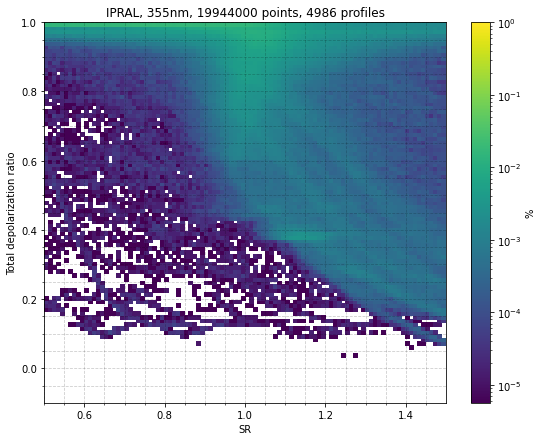

In [9]:
X = all_SR.values.ravel()
Y = all_depol.values.ravel()
# X = X[~np.isnan(X)&~np.isnan(Y)]
# Y = Y[~np.isnan(X)&~np.isnan(Y)]

rangeY = [-0.1, 1.0]
rangeX = [0.5, 1.5]
H = np.histogram2d(X[~np.isnan(X)&~np.isnan(Y)], Y[~np.isnan(X)&~np.isnan(Y)], bins=100, range=[rangeX, rangeY])
HProbas = H[0]*100/len(X[~np.isnan(X)&~np.isnan(Y)])
Xxedges, Yyedges = np.meshgrid(H[1], H[2])
fig, ax = plt.subplots(figsize=(9,7))
p = ax.pcolormesh(Xxedges, Yyedges, HProbas.T, norm=LogNorm(vmax=1e0))
c = plt.colorbar(p, ax=ax, label='%')
ax.set(xlabel='SR', ylabel='Total depolarization ratio', 
       title= f'IPRAL, {wave}nm, {len(X)} points, {all_SR.shape[0]} profiles')
ax.grid(axis="both")
plt.minorticks_on()
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)


In [11]:
data = xr.open_dataset(sorted(Path('/homedata/nmpnguyen/IPRAL/RF/Calibrated/').glob('*20181106*.nc'))[0])

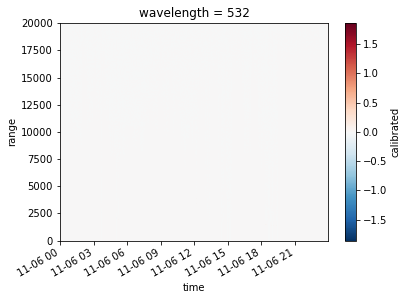

In [12]:
data['calibrated'].sel(wavelength=532).plot(x='time', y='range', ylim=(0,20000), norm)

## Calibration test

In [319]:
from argparse import Namespace, ArgumentParser  
parser = ArgumentParser()
parser.add_argument("--ztop", "-top", type=int, help="bound top of calibration height", required=True)
parser.add_argument("--zbottom", "-bottom", type=int, help="bound top of calibration height", required=True)
parser.add_argument("--filterHeight", "-fH", type=int, help="Top of Hieght where cloud are filted", required=True)
parser.add_argument("--add_file", "-f", type=str, help="add a file to calibrate", required=False)
parser.add_argument("--out_file", "-o", type=str, help="output suffixe name of add_file", required=False)

_StoreAction(option_strings=['--out_file', '-o'], dest='out_file', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='output suffixe name of add_file', metavar=None)

In [320]:
# opts = parser.parse_args("-- ztop 7000 --zbottom 5000 --filterHeight 4000 -add_file /bdd/SIRTA/pub/basesirta/1a/ipral/2018/09/29/ipral_1a_Lz1R15mF30sPbck_v01_20180929_000000_1440.nc -o RF_v.nc".split())

In [321]:
class Args:
    ztop = 7000
    zbottom = 5000
    filterHeight = 4000
    add_file = '/bdd/SIRTA/pub/basesirta/1a/ipral/2018/04/06/ipral_1a_Lz1R15mF30sPbck_v01_20180406_000000_1440.nc'
    out_file = 'RF_v2.nc'
    pkl_file = '/homedata/nmpnguyen/IPRAL/RF/Simul/ipral_1a_Lz1R15mF30sPbck_v01_20180406_000000_1440_simul.pkl'

opts=Args()

In [322]:
def correction_background(fileipral, channel):
    signal = fileipral[channel]
    bckgrd = fileipral['bckgrd_'+channel]
    ipralrange = fileipral['range'].values
    iprcsbck = (signal/(ipralrange**2) - bckgrd)*(ipralrange**2)
    return iprcsbck


def get_altitude_reference(zbottom, ztop, altitude_total):
    '''
    Fonction permet de retrouver la position de l'altitude référence dans le vecteur de l'altitude et la valeur de altitude référence.
    Input:
        zbottom: le borne bas de l'intervale
        ztop: le borne haut de l'intervale
        altitude_total: le vecteur total de l'altitude
    Output:
        la valeur de l'altitude et son indexe dans le vecteur total
    '''
    def arg_median(a):
        '''
        Fonction permet de retrouver la position médiane de la zone de référence de l'altitude
        Input: 
            a = l'intervale de l'altitude où se trouve la zone de référence 
        Ouput:
            Indexe de la position dans cet intervale
        '''
        if len(a) % 2 == 1:
            return np.where(a == np.median(a))[0][0]
        else:
            l,r = len(a) // 2 - 1, len(a) // 2
            left = np.partition(a, l)[l]
            right = np.partition(a, r)[r]
            return np.where(a == left)[0][0]

    interval_ref = altitude_total[(altitude_total >= zbottom) & (altitude_total <= ztop)] 
    idxref = arg_median(interval_ref)
    zref = interval_ref[idxref]
    idxref_in_total = np.where(altitude_total == zref)[0][0]
    return zref, idxref_in_total



'''
2. Calculer le profil BetaMol[z]*Tr2(AlphaMol(z))[z0] 
Et calculer son integrale entre zmin et zmax
'''
def get_backscatter_mol(p, T, w):
    '''
    Fonction permet de calculer le coef. de backscatter moléculaire 
    p(Pa), T(K), w(um)
    '''
    k = 1.38e-23
    betamol = (p/(k*T) * 5.45e-32 * (w/0.55)**(-4.09))
    alphamol = betamol/0.119
    return alphamol, betamol


def get_backscatter_mol_attn_v1(alphamol, betamol, alt, idxref):
    '''
    Cette fonction permet de calculer la retrodiffusion attenuee à partir de zref, data2D
    Input: AlphaMol 2D, Betamol2D, alt 1D, indice de l'altitude médiane entre zmin et zmax
    Output: profil attenue 2D
    '''
    Tr = betamol[:,idxref:].copy() #np.zeros_like(BetaMol[idx_ref:])
    Tr2 = np.zeros_like(betamol[:,idxref:])
    # print(len(Tr), len(Tr2))

    for i,j in zip(range(1, Tr2.shape[1]),range(idxref+1, len(alt))):
        Tr[:,i] = Tr[:,i-1] + alphamol[:,i]*(alt[j]-alt[j-1])
        Tr2[:,i] = np.exp(-2*Tr[:,i])

    betamol_Z0 = betamol.copy() #np.ones_like(BetaMol)   
    betamol_Z0[:,idxref+1:] = betamol[:,idxref+1:]*Tr2[:,1:]
    # print(betamol_Z0[idxref])  
    return betamol_Z0


def get_backscatter_mol_attn_v2(alphamol, betamol, alt):
    '''
    Cette fonction permet de calculer la retrodiffusion attenuee à partir de l'altitude de l'instrument, data2D
    Input: AlphaMol 2D, Betamol2D, alt 1D
    Output: profil attenue 2D
    '''
    Tr = np.zeros_like(betamol)
    Tr2 = np.zeros_like(betamol)
    
    for i in range(1, Tr2.shape[1]):
        Tr[:,i] = Tr[:,i-1] + alphamol[:,i]*(alt[i]-alt[i-1])
        Tr2[:,i] = np.exp(-2*Tr[:,i])
        
    betamol_Z0 = betamol*Tr2        
    return betamol_Z0



In [323]:
import sys
sys.path.append('/homedata/nmpnguyen/ipral-tools/')
# from imp import reload as rl
# rl(ipral_chm15k_cloud_filter, ipral_variables_simulation)
from ipral_chm15k_cloud_filter import ipral_remove_cloud_profiles as cloud_filter
from ipral_variables_simulation import simulate


if opts.add_file:
    ipral_folder = [Path(opts.add_file)]
else:
    IPRAL_PATH = Path("/bdd/SIRTA/pub/basesirta/1a/ipral/2018/")
    ipral_folder = sorted(IPRAL_PATH.glob('**/**/ipral_1a_Lz1R15mF30sPbck_v01_*_000000_1440.nc'))


### Determiner z0
zbottom = opts.zbottom #5000
ztop = opts.ztop #7000

wavelengths = [355, 355, 532, 532]
channels = ['rcs_12', 'rcs_13', 'rcs_16', 'rcs_17']
modes = ['355-analog-NearField', '355-photocounting-NearField', '532-analog-NearField', '532-photocounting-NearField']

In [324]:
file_ipral = opts.add_file
ipralraw = xr.open_dataset(file_ipral)
# ipralsimul = simulate(Path(opts.add_file))
ipralsimul = pd.read_pickle(opts.pkl_file)

In [325]:
pression = ipralsimul['pression'].unstack(level=1)
ta = ipralsimul['ta'].unstack(level=1)

In [326]:
print(pression.shape,ipralraw['time'])
# a = np.intersect1d(pression.index, ipralraw['time'].values, return_indices=True)
# ipralraw['time'][~a[2]]

(916, 4000) <xarray.DataArray 'time' (time: 916)>
array(['2018-04-06T15:00:58.000000000', '2018-04-06T15:01:28.000000256',
       '2018-04-06T16:18:18.000000000', ..., '2018-04-06T23:58:14.000000000',
       '2018-04-06T23:58:44.000000256', '2018-04-06T23:59:14.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-04-06T15:00:58 ... 2018-04-06T23:59:14
Attributes:
    standard_name:  time
    bounds:         time_bnds


In [327]:
data = ipralraw
nb = 0
w = wavelengths[nb]
channel = channels[nb]

### Range corrected signal - Background
iprcs = correction_background(ipralraw, channel)

### Determiner z0
ipralrange = ipralraw['range'].values
Z0, idx_ref = get_altitude_reference(zbottom, ztop, ipralrange)
zintervalle = np.where((ipralrange >= zbottom) & (ipralrange <= ztop))[0]

'''
Appliquer aux données Opar : nuage 21.01.2019 et ciel clair 17.06.2019
1. Calculer le profil Pr2_z0 = Pr2[z]/Pr2[z0] 
puis calculer la valeur de son intégrale etre zmin et zmax
'''
Pr2_Z0 = iprcs/iprcs.isel(range=idx_ref)
Pr2_integ = np.zeros(len(ipralraw['time']))
for z in zintervalle[:-1]:
    Pr2_integ = Pr2_integ + Pr2_Z0.isel(range=z).values*(ipralrange[z+1]-ipralrange[z])

Pr2_integ_v2 = np.mean(iprcs[:,zintervalle], axis=1)
'''
2. Calculer le profil BetaMol[z]*Tr2(AlphaMol(z))[z0] 
Et calculer son integrale entre zmin et zmax
'''
AlphaMol, BetaMol = get_backscatter_mol(pression.values, ta.values, w*1e-3)

# BetaMol_Z0_v2 = np.array([get_backscatter_mol_attn_v2(AlphaMol[i,:], BetaMol[i,:], ipralrange) for i in range(len(iprcs['time']))])
# BetaMol_Z0 = np.array([get_backscatter_mol_attn_v1(AlphaMol[i,:], BetaMol[i,:], ipralrange, idx_ref) for i in range(len(iprcs['time']))])
BetaMol_Z0 = get_backscatter_mol_attn_v1(AlphaMol, BetaMol, ipralrange, idx_ref)
BetaMol_Z0_v2 = get_backscatter_mol_attn_v2(AlphaMol, BetaMol, ipralrange)
BetaMol_integ = 0; BetaMol_integ_v2 = 0
for z in zintervalle[:-1]:
    BetaMol_integ = BetaMol_integ + BetaMol_Z0[:,z]*(ipralrange[z+1]-ipralrange[z])

BetaMol_integ_v2 = np.mean(BetaMol_Z0_v2[:,zintervalle], axis=1)

In [328]:
print(ipralraw['time'][1:])

<xarray.DataArray 'time' (time: 915)>
array(['2018-04-06T15:01:28.000000256', '2018-04-06T16:18:18.000000000',
       '2018-04-06T16:18:49.000000000', ..., '2018-04-06T23:58:14.000000000',
       '2018-04-06T23:58:44.000000256', '2018-04-06T23:59:14.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-04-06T15:01:28.000000256 ... 2018-04-...
Attributes:
    standard_name:  time
    bounds:         time_bnds


In [329]:
'''
3. Diviser l'un par l'autre pour obtenir cRF
'''
print(AlphaMol.shape)
cRF = (BetaMol_integ/Pr2_integ).reshape(-1,1)
cRF_v2 = (BetaMol_integ_v2/Pr2_integ_v2).values.reshape(-1,1)

'''
4. Normaliser les profils mesures par cRF
'''
Pr2_norm = Pr2_Z0*cRF #.isel(time = range(1, len(ipralraw['time'])))
Pr2_norm_v2 = iprcs*cRF_v2 #.isel(time = range(1, len(ipralraw['time'])))

(916, 4000)


In [330]:
# pr2_Z0, pr2_norm, betamol_Z0 = processed(355, pression, ta, ztop, zbottom, ipralraw)


[  1 457 914]


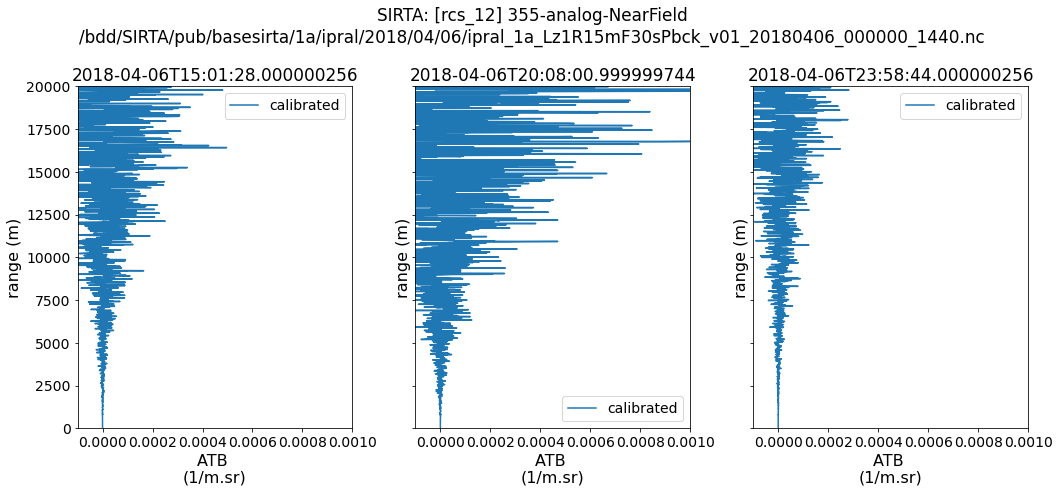

In [340]:
N = np.int_(np.linspace(1, len(ipralraw['time'])-2, 3))
print(N)
f, axs = plt.subplots(figsize=[15,7], nrows=1, ncols=3, sharey=True)
for n, ax in enumerate(axs.flatten()):
#     ax.plot(BetaMol_Z0[N[n],:], ipralrange, label='simulated', zorder=10)
    ax.plot(Pr2_norm[N[n],:], ipralrange, label='calibrated')
#     ax.plot(BetaMol_Z0_v2[N[n],:], ipralrange, label='simulated_v2')
#     ax.plot(Pr2_norm_v2[N[n],:], ipralrange, label='calibrated_v2')
#     ax.plot(np.mean(Pr2_norm[N[n],:].reshape(-1, 2), axis=1), np.mean(ipralrange.reshape(-1, 2), axis=1), label='calibrated')
#     ax.plot(np.mean(BetaMol_Z0[N[n],:].reshape(-1, 2), axis=1), np.mean(ipralrange.reshape(-1, 2), axis=1), label='simulated')
#     ax2 = ax.twiny()
#     Pr2_Z0.isel(time = N[n]).plot(y='range', ax=ax2, label='RCS', color='g')
    ax.legend()
    ax.set(ylabel ='range (m)', xlabel = 'ATB \n(1/m.sr)', title = ipralraw['time'][N[n]].values)
    ax.set_ylim(0, 20000)
    ax.set_xlim(-1e-4, 1e-3)
    ax2.legend()
#     ax2.set_ylim(0, 20000)
    
plt.suptitle(f'SIRTA: [{channels[nb]}] {modes[nb]}\n{opts.add_file}')
plt.tight_layout()

# ax.set_xlim(0, 4e-5)
# ax2.set_xlim(0, 2e-5)

[  1 457 914]


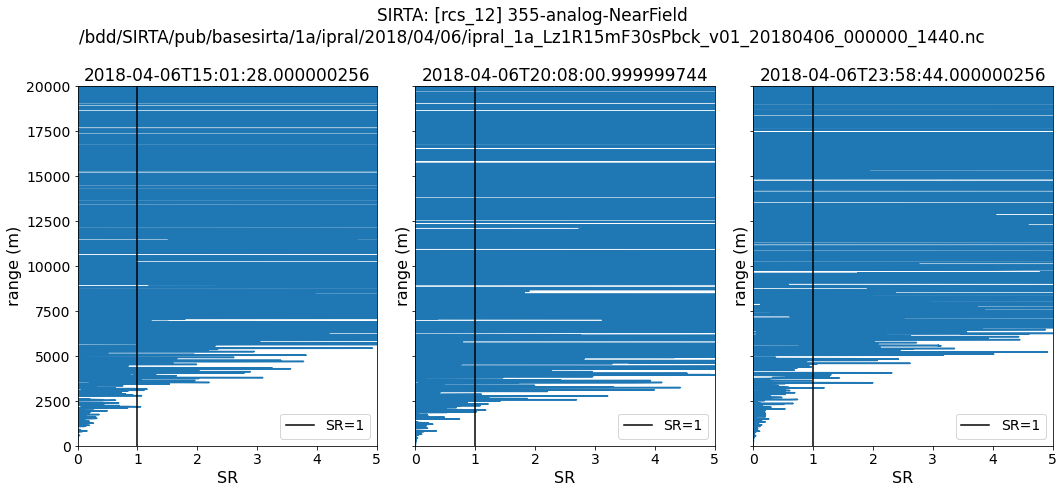

In [332]:
%matplotlib inline
N = np.int_(np.linspace(1, len(ipralraw['time'])-2, 3))
print(N)
f, axs = plt.subplots(figsize=[15,7], nrows=1, ncols=3, sharey=True)
plt.rcParams['font.size'] = '14'
plt.rcParams['axes.labelsize'] = '16'
plt.rcParams['axes.labelsize'] = '16'
plt.rcParams['xtick.labelsize']= '14'
plt.rcParams['ytick.labelsize']= '14'
for n, ax in enumerate(axs.flatten()):
    ax.plot(Pr2_norm[N[n],:]/BetaMol_Z0[N[n],:], ipralrange)
#     ax.plot(Pr2_norm_v2[N[n],:]/BetaMol_Z0_v2[N[n],:], ipralrange)
#     ax2.plot(np.mean(Pr2_norm_v2[10,:].reshape(-1, 10), axis=1)/np.mean(BetaMol_Z0_v2[10,:].reshape(-1, 10), axis=1),
#              np.mean(ipralrange.reshape(-1, 10), axis=1), label='_v2')
    ax.axvline(1, c='k', label='SR=1')
    ax.set(ylabel ='range (m)', xlabel = 'SR', title = ipralraw['time'][N[n]].values)
    ax.legend()
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 20000)
#     ax2.axvline(1, c='r')
#     ax2.set_xlim(0, 5)
#     ax2.set_ylim(0, 30000)

plt.suptitle(f'SIRTA: [{channels[nb]}] {modes[nb]}\n{opts.add_file}')
plt.tight_layout()
plt.show()

In [39]:
ds = xr.Dataset(data_vars = {"calibrated": (("time","range"), Pr2_norm_v2),
                                "simulated": (("time","range"), BetaMol_Z0_v2),}, 
                    coords = {
                        "time":ipralraw['time'].values[1:],
                        "range": ipralraw['range'].values,                       
                    },
                    attrs = {"calibration height": [zbottom, ztop],},) 

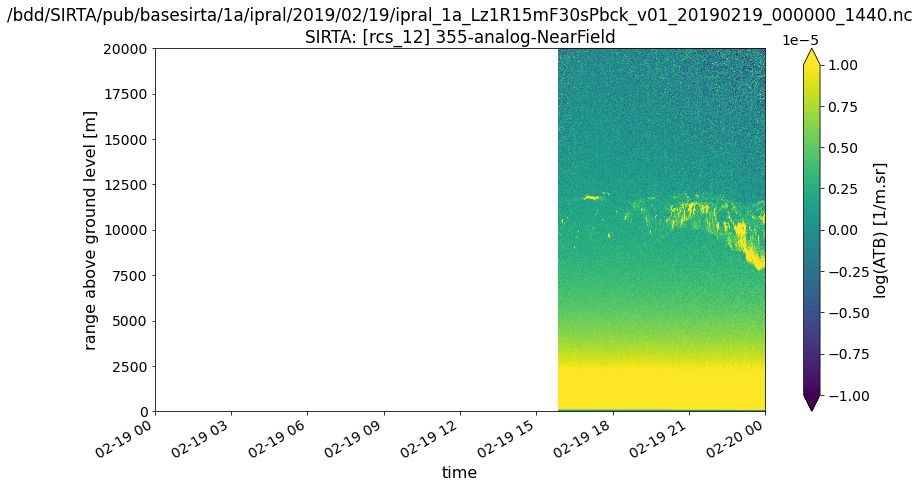

In [117]:
X, Y = np.meshgrid(ipralraw['time'].values[1:], ipralrange)

f, ax = plt.subplots(figsize=[12,7])
Pr2_norm.plot(ax=ax, x='time', y='range', vmin=-1e-5, vmax = 1e-5,
                      cbar_kwargs={'label':'log(ATB) [1/m.sr]'})

ax.set_ylim(0, 20000)
ax.set_xlim(dateStart, dateEnd)
ax.set(title=f'{opts.add_file}\nSIRTA: [{channels[nb]}] {modes[nb]}')
plt.tight_layout()


(0.0, 20000.0)

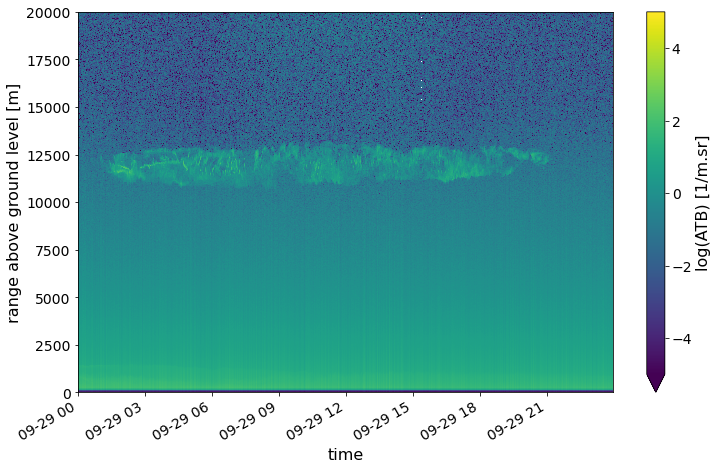

In [103]:
Pr2_Z0
f, ax = plt.subplots(figsize=[12,7])
np.log(Pr2_Z0).plot(ax=ax, x='time', y='range', vmin=-5, vmax=5,
                      cbar_kwargs={'label':'log(ATB) [1/m.sr]'})
ax.set_ylim(0, 20000)

In [355]:
sorted(Path("/bdd/SIRTA/pub/basesirta/1a/ipral/2018/").glob('**/**/ipral_1a_Lz1R15mF30sPbck_v01_*_000000_1440.nc'))[48:]

[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/01/ipral_1a_Lz1R15mF30sPbck_v01_20180701_000000_1440.nc'),
 PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/03/ipral_1a_Lz1R15mF30sPbck_v01_20180703_000000_1440.nc'),
 PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/04/ipral_1a_Lz1R15mF30sPbck_v01_20180704_000000_1440.nc'),
 PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/06/ipral_1a_Lz1R15mF30sPbck_v01_20180706_000000_1440.nc'),
 PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/09/ipral_1a_Lz1R15mF30sPbck_v01_20180709_000000_1440.nc'),
 PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/10/ipral_1a_Lz1R15mF30sPbck_v01_20180710_000000_1440.nc'),
 PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/11/ipral_1a_Lz1R15mF30sPbck_v01_20180711_000000_1440.nc'),
 PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/12/ipral_1a_Lz1R15mF30sPbck_v01_20180712_000000_1440.nc'),
 PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/13/ipral_1a_Lz1R15mF30sPbck_v01_20180713_0

In [118]:
IPRAL_SIMUL_PATH = Path('/homedata/nmpnguyen/IPRAL/RF/Simul/')
ipral_simul_folder = sorted(IPRAL_SIMUL_PATH.glob('*_simul.pkl'))

In [120]:
for file_simul in ipral_simul_folder: 
#     ipralsimul = pd.read_pickle(file_simul)
    print(file_simul.name)
    file_ipral_name = file_simul.name.split('_simul')[0]+'.nc'
    file_ipral = list(Path('/bdd/SIRTA/pub/basesirta/1a/ipral/').glob('**/**/'+file_ipral_name))[0]
    print(file_ipral)

ipral_1a_Lz1R15mF30sPbck_v01_20180221_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/02/21/ipral_1a_Lz1R15mF30sPbck_v01_20180221_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20180222_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/02/22/ipral_1a_Lz1R15mF30sPbck_v01_20180222_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20180223_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/02/23/ipral_1a_Lz1R15mF30sPbck_v01_20180223_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20180224_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/02/24/ipral_1a_Lz1R15mF30sPbck_v01_20180224_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20180225_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/02/25/ipral_1a_Lz1R15mF30sPbck_v01_20180225_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20180226_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/02/26/ipral_1a_Lz1R15mF3

[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/09/29/ipral_1a_Lz1R15mF30sPbck_v01_20180929_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20190215_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2019/02/15/ipral_1a_Lz1R15mF30sPbck_v01_20190215_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20190218_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2019/02/18/ipral_1a_Lz1R15mF30sPbck_v01_20190218_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20190219_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2019/02/19/ipral_1a_Lz1R15mF30sPbck_v01_20190219_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20190220_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2019/02/20/ipral_1a_Lz1R15mF30sPbck_v01_20190220_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPbck_v01_20190221_000000_1440_simul.pkl
[PosixPath('/bdd/SIRTA/pub/basesirta/1a/ipral/2019/02/21/ipral_1a_Lz1R15mF30sPbck_v01_20190221_000000_1440.nc')]
ipral_1a_Lz1R15mF30sPb

### Modifier ipral_variables_simulation.py

In [3]:
ipral_file = Path('/bdd/SIRTA/pub/basesirta/1a/ipral/2018/07/01/ipral_1a_Lz1R15mF30sPbck_v01_20180701_000000_1440.nc')
d = xr.open_dataset(ipral_file)
time = d.time.values
YEAR = pd.to_datetime(time[0]).strftime('%Y')
MONTH = pd.to_datetime(time[0]).strftime('%m')
lon_ipral = round(4*float(d.geospatial_lon_min))/4 #round(float(d.geospatial_lon_min),2)
lat_ipral = round(4*float(d.geospatial_lat_min))/4
print(f'longitude: {lon_ipral}')
print(f'latitude: {lat_ipral}')

longitude: 2.25
latitude: 48.75


In [4]:
pd.to_datetime(time[0]).strftime('%m') == pd.to_datetime(time[-1]).strftime('%m')

False

In [5]:
print('-----GET ERA5 FILE-----')
ERA_FOLDER = Path("/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_PL")

ERA_FILENAME = YEAR+MONTH+".ap1e5.GLOBAL_025.nc"
GEOPT_PATH = ERA_FOLDER / YEAR / Path("geopt."+ERA_FILENAME)
TA_PATH = ERA_FOLDER / YEAR / Path("ta."+ERA_FILENAME)
geopt = xr.open_dataset(GEOPT_PATH)
ta = xr.open_dataset(TA_PATH)

-----GET ERA5 FILE-----


In [6]:
print('-----CONVERT TIME AND LOCALISATION-----')
# date_start = pd.to_datetime(time[0])
# date_end = pd.to_datetime(time[-1])
time = pd.to_datetime(time).strftime('%Y-%m-%dT%H:00:00.000000000')
time = time.astype('datetime64[ns]')
time_unique = np.unique(time)
LAT = geopt.latitude[np.where(np.abs(geopt.latitude.values - lat_ipral) <=0.25)[0][1]].values
LON = geopt.longitude[np.where(np.abs(geopt.longitude.values - lon_ipral) <=0.25)[0][1]].values
#----

if pd.to_datetime(time[-1]).strftime('%m')==pd.to_datetime(time[0]).strftime('%m'):
    print(f'path of temperature {TA_PATH}')
    print(f'path of geopotential {GEOPT_PATH}')
else:
    YEAR = pd.to_datetime(time[-1]).strftime('%Y')
    MONTH = pd.to_datetime(time[-1]).strftime('%m')
    ERA_FILENAME = YEAR+MONTH+".ap1e5.GLOBAL_025.nc"
    GEOPT_PATH = [GEOPT_PATH, ERA_FOLDER / YEAR / Path("geopt."+ERA_FILENAME)]
    TA_PATH = [TA_PATH, ERA_FOLDER / YEAR / Path("ta."+ERA_FILENAME)]
    print(f'path of temperature {TA_PATH}')
    print(f'path of geopotential {GEOPT_PATH}')
    geopt1 = xr.open_dataset(GEOPT_PATH[1])
    ta1 = xr.open_dataset(TA_PATH[1])
#     geopt = xr.concat([geopt, geopt1], dim='time')
#     ta = xr.concat([ta, ta1], dim='time')

-----CONVERT TIME AND LOCALISATION-----
path of temperature [PosixPath('/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_PL/2018/ta.201806.ap1e5.GLOBAL_025.nc'), PosixPath('/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_PL/2018/ta.201807.ap1e5.GLOBAL_025.nc')]
path of geopotential [PosixPath('/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_PL/2018/geopt.201806.ap1e5.GLOBAL_025.nc'), PosixPath('/bdd/ERA5/NETCDF/GLOBAL_025/hourly/AN_PL/2018/geopt.201807.ap1e5.GLOBAL_025.nc')]


In [11]:
# time_unique, geopt['time'].values, geopt1['time'].values
print(np.intersect1d(time_unique, geopt['time'].values))
print(np.intersect1d(time_unique, geopt1['time'].values))

['2018-06-30T23:00:00.000000000']
['2018-07-01T00:00:00.000000000' '2018-07-01T01:00:00.000000000'
 '2018-07-01T02:00:00.000000000' '2018-07-01T03:00:00.000000000'
 '2018-07-01T04:00:00.000000000' '2018-07-01T05:00:00.000000000'
 '2018-07-01T06:00:00.000000000' '2018-07-01T07:00:00.000000000'
 '2018-07-01T08:00:00.000000000' '2018-07-01T09:00:00.000000000'
 '2018-07-01T10:00:00.000000000' '2018-07-01T11:00:00.000000000'
 '2018-07-01T12:00:00.000000000' '2018-07-01T13:00:00.000000000'
 '2018-07-01T14:00:00.000000000' '2018-07-01T15:00:00.000000000'
 '2018-07-01T16:00:00.000000000' '2018-07-01T17:00:00.000000000'
 '2018-07-01T18:00:00.000000000' '2018-07-01T19:00:00.000000000']


In [17]:
g = geopt.sel(latitude=LAT, longitude=LON, time=np.intersect1d(time_unique, geopt['time'].values))#.to_dataframe()

In [18]:
g1 = geopt1.sel(latitude=LAT, longitude=LON, time=np.intersect1d(time_unique, geopt1['time'].values))#.to_dataframe()

In [20]:
geopt_for_ipral = xr.concat([g, g1], dim='time').to_dataframe()

longitude  latitude          geopt
level time                                                   
1     2018-06-30 23:00:00       2.25     48.75  481369.437500
      2018-07-01 00:00:00       2.25     48.75  480650.375000
      2018-07-01 01:00:00       2.25     48.75  480317.562500
      2018-07-01 02:00:00       2.25     48.75  479866.875000
      2018-07-01 03:00:00       2.25     48.75  479914.625000
...                              ...       ...            ...
1000  2018-07-01 15:00:00       2.25     48.75     789.795898
      2018-07-01 16:00:00       2.25     48.75     761.253662
      2018-07-01 17:00:00       2.25     48.75     761.463867
      2018-07-01 18:00:00       2.25     48.75     792.930420
      2018-07-01 19:00:00       2.25     48.75     792.669678

[777 rows x 3 columns]

### Test raw and calibrated signal

In [30]:
class Args:
    ztop = 7000
    zbottom = 5000
    filterHeight = 4000
    add_file = '/bdd/SIRTA/pub/basesirta/1a/ipral/2018/02/21/ipral_1a_Lz1R15mF30sPbck_v01_20180221_000000_1440.nc'
    out_file = '/homedata/nmpnguyen/IPRAL/RF/Calibrated/ipral_1a_Lz1R15mF30sPbck_v01_20180221_000000_1440.nc'
    pkl_file = '/homedata/nmpnguyen/IPRAL/RF/Simul/ipral_1a_Lz1R15mF30sPbck_v01_20180221_000000_1440_simul.pkl'

opts=Args()

In [31]:
raw = xr.open_dataset(Path(opts.add_file))
new = xr.open_dataset(Path(opts.out_file))

In [32]:
channels = ['rcs_12', 'rcs_13', 'rcs_16', 'rcs_17']
modes = ['355-analog-NearField', '355-photocounting-NearField', '532-analog-NearField', '532-photocounting-NearField']
nb =0
limiteZ = np.where(raw['range']<=20000)[0]
dateStart = pd.to_datetime(Path(opts.add_file).name.split('_')[4])
dateEnd = dateStart + pd.DateOffset(1)
print(dateStart, dateEnd)

2018-02-21 00:00:00 2018-02-22 00:00:00


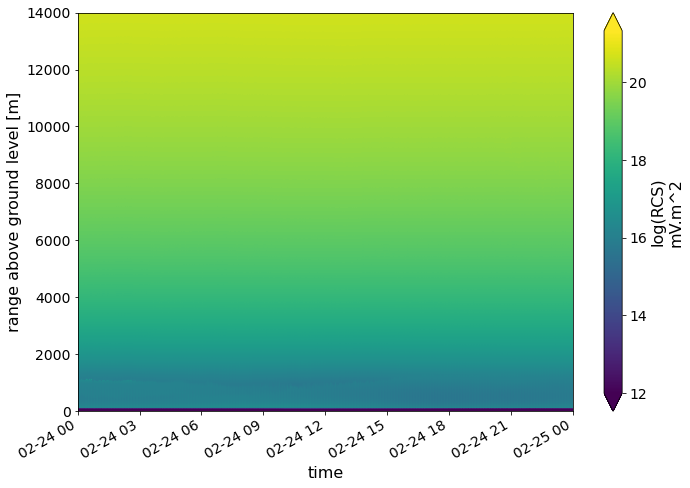

In [22]:
f, ax = plt.subplots(figsize=[10,7], nrows=1, ncols=1)
plt.rcParams['font.size'] = '14'
plt.rcParams['axes.labelsize'] = '16'

np.log(raw[channels[nb]].isel(range=limiteZ)).plot(ax= ax, x = 'time', y='range', cmap = 'viridis', vmin=12, 
                                  cbar_kwargs={"label": f'log(RCS)\n{raw[channels[nb]].attrs["units"]}'}, robust=True)
ax.set_ylim(0,14000)
ax.set_xlim(dateStart, dateEnd)
# ax.set(title=f'SIRTA: [{channels[nb]}] {modes[nb]}\n{ipralpath}')
plt.tight_layout()


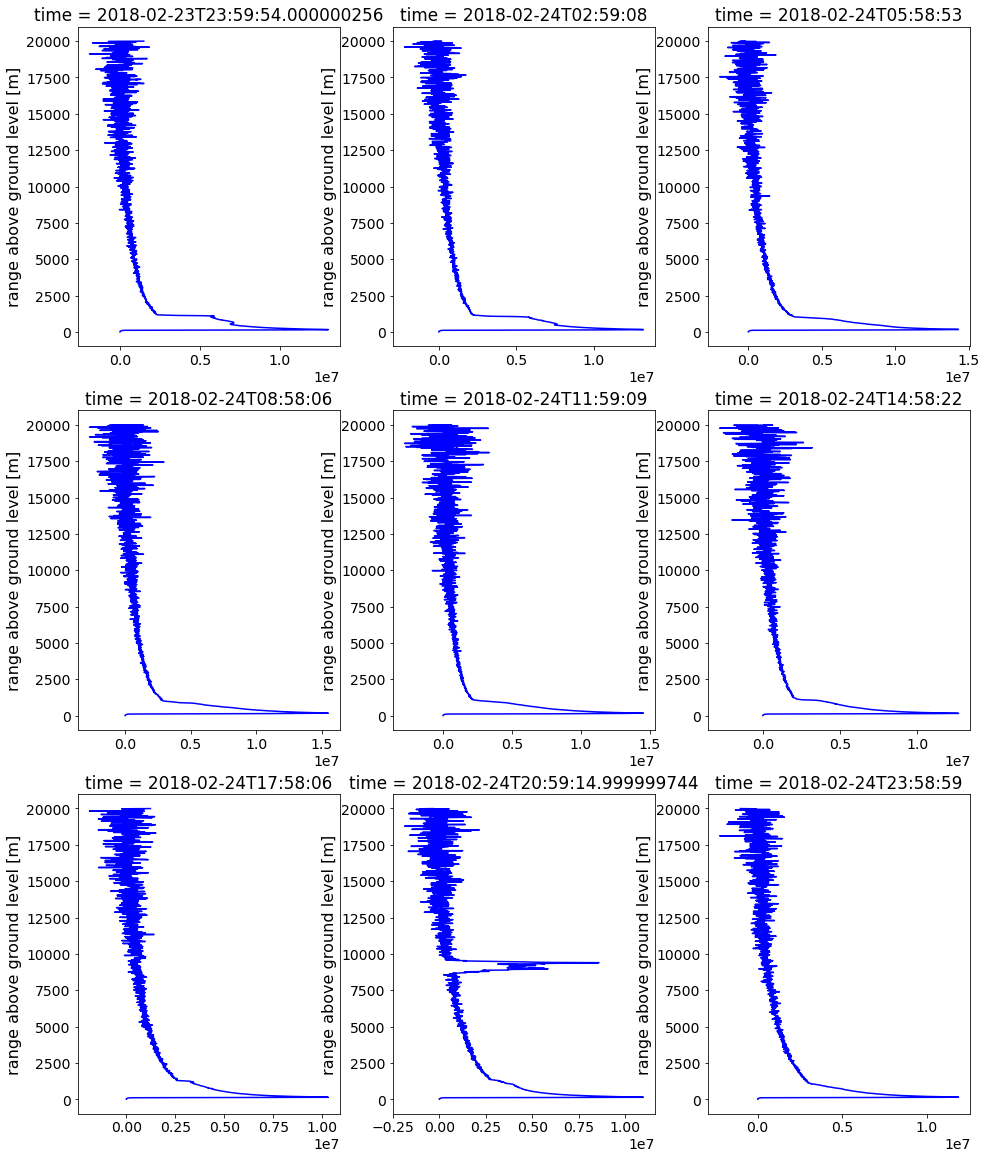

In [23]:
corrected = (raw[channels[nb]]/np.square(raw['range']) - raw['bckgrd_'+channels[nb]])*np.square(raw['range'])
# corrected
f, axs = plt.subplots(figsize=[16,20], nrows=3, ncols=3)
N = np.int_(np.linspace(0, len(raw['time'])-1, 9))
for n, ax in enumerate(axs.flatten()):
#     raw[channels[nb]].isel(range=limiteZ, time=N[n]).plot(y='range', ax=ax)
    corrected.isel(range=limiteZ, time=N[n]).plot(y='range', ax=ax, c='b')

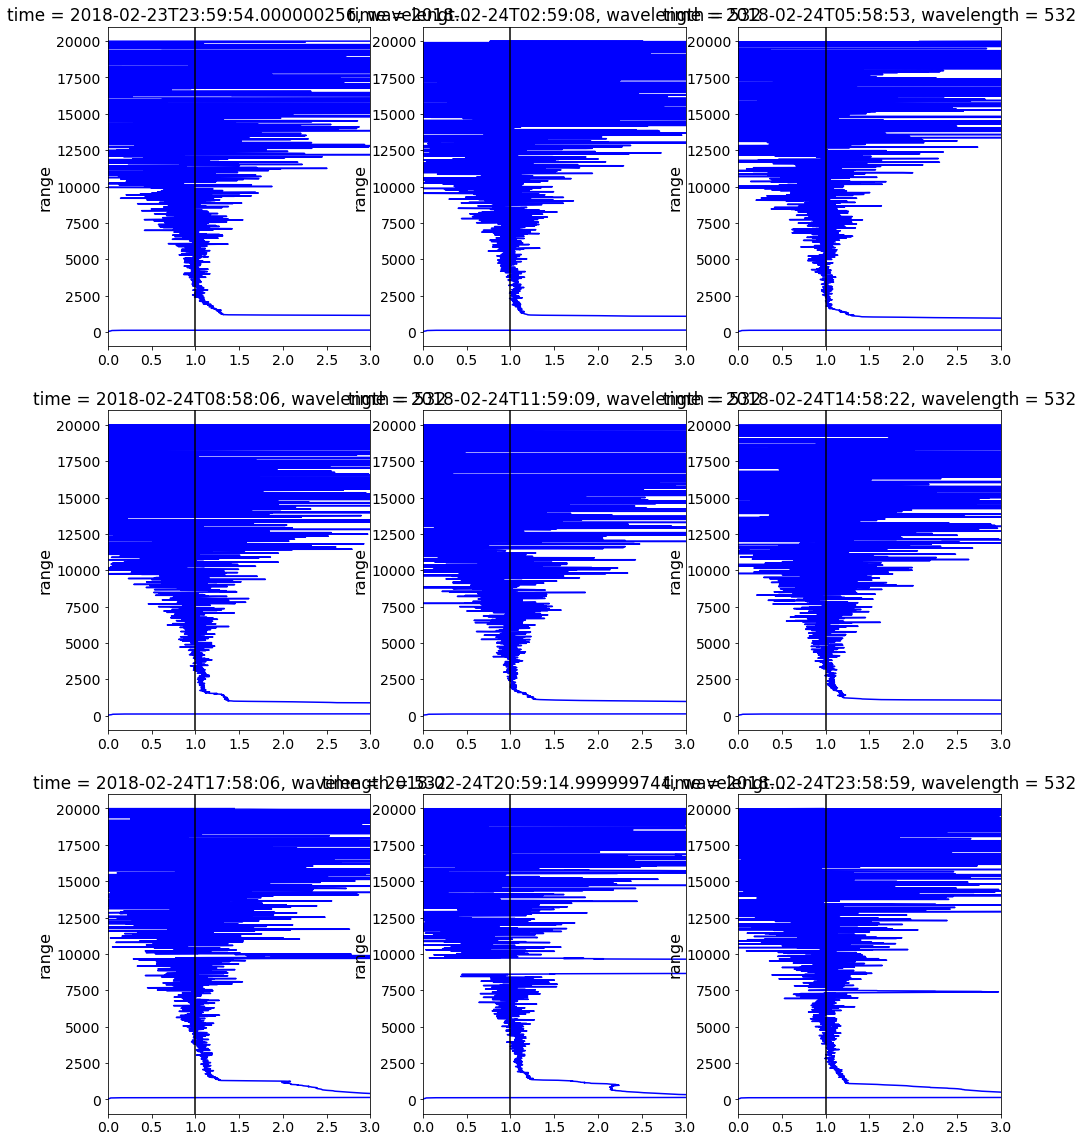

In [24]:
f, axs = plt.subplots(figsize=[16,20], nrows=3, ncols=3)
N = np.int_(np.linspace(0, len(new['time'])-1, 9))
for n, ax in enumerate(axs.flatten()):
#     new['simulated'].isel(range=limiteZ, time=N[n], wavelength=1).plot(y='range', ax=ax, color='r', zorder=10)
#     new['calibrated'].isel(range=limiteZ, time=N[n], wavelength=1).plot(y='range', ax=ax, color='b')
    (new['calibrated'].isel(range=limiteZ, time=N[n], wavelength=1)/new['simulated'].isel(range=limiteZ, time=N[n], wavelength=1)).plot(y='range', ax=ax, color='b')
    ax.axvline(1, c='k')
    ax.set_xlim(0,3)

In [44]:
def filter_profile_file(file, channel, limiteTop, limiteBottom):
    filecorrected = (file[channel]/np.square(file['range']) - file['bckgrd_'+channel])*np.square(file['range'])
    meanTop = filecorrected.isel(range=limiteTop).mean(dim='range')
    meanBottom = filecorrected.isel(range=limiteBottom).mean(dim='range')
    index_mask = np.where(np.array(meanTop-meanBottom)<0)[0] #selectionner le profil correct
    return index_mask

In [38]:
limiteZTop = (raw['range']>25000) & (raw['range']<27000)
limiteZBottom = (raw['range']>2000) & (raw['range']<3000)

idsmask = filter_profile_file(raw, 'rcs_16', limiteZTop, limiteZBottom)

In [39]:
if len(idsmask)==0:
    print('File is Null')
else:
    filted_rcs = raw.isel(time=idsmask)

(378, 817)